In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# General Additive Model

## Helper Functions

In [2]:
df = pd.read_csv('data/ia_Paragraph_with_pythia_surprisal.csv')

In [3]:
def get_lower_upper_bounds(df, column):
    sns.boxplot(x=df[column])
    plt.title("Boxplot of Reading Time")
    plt.show()


    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    lower_bound = lower_bound if lower_bound > 0 else 0
    upper_bound = Q3 + 1.5 * IQR
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}")
    return lower_bound, upper_bound

In [4]:
def GAM_summary(df, column):
    tmp = df[(df[column] >= lower_bound*2) & (df[column] <= upper_bound*2)]
    tmp = tmp[~tmp['pythia_surprisal'].isnull()]

    X = tmp[['pythia_surprisal', 'word_length', 'wordfreq_frequency']]
    y = tmp[column]

    X = sm.add_constant(X)

    lin_model = sm.OLS(y, X).fit()

    # Extract the coefficient, t-score, p-value, and R² score
    coefficients = lin_model.params
    t_scores = lin_model.tvalues
    p_values = lin_model.pvalues
    r2 = lin_model.rsquared

    print(lin_model.summary())
    print("\nCoefficients:")
    print(f"Pythia Surprisal: {coefficients['pythia_surprisal']:.4f}, T-score: {t_scores['pythia_surprisal']:.4f}, P-value: {p_values['pythia_surprisal']:.4f}")
    print(f"word_length: {coefficients['word_length']:.4f}, T-score: {t_scores['word_length']:.4f}, P-value: {p_values['word_length']:.4f}")
    print(f"log_frequency: {coefficients['wordfreq_frequency']:.4f}, T-score: {t_scores['wordfreq_frequency']:.4f}, P-value: {p_values['wordfreq_frequency']:.4f}")
    print(f"R² score: {r2:.4f}")
    return tmp

In [5]:
def make_spillover_column(tmp, column):
    tmp['pythia_word_probability'] = tmp['pythia_surprisal'].apply(
        lambda s: 2 ** (-s) if pd.notnull(s) else None
    )

    spillovers = []
    for idx in range(len(tmp)):
        if idx == len(tmp) - 1:
            spillovers.append(None)
            continue
        row = tmp.iloc[idx]
        next_row = tmp.iloc[idx + 1]
        if row['paragraph'] == next_row['paragraph']:
            spillovers.append(next_row[column])
        else:
            spillovers.append(None)
    tmp['spillover_rt'] = spillovers

In [6]:
def GAM_summary_current_word(tmp, column):
    tmp = tmp.dropna(subset=['pythia_word_probability', column, 'word_length', 'wordfreq_frequency'])

    X = tmp[['pythia_word_probability', 'word_length', 'wordfreq_frequency']]
    y = tmp[column]

    X = sm.add_constant(X)

    lin_model = sm.OLS(y, X).fit()

    # Extract the coefficient, t-score, p-value, and R² score
    coefficients = lin_model.params
    t_scores = lin_model.tvalues
    p_values = lin_model.pvalues
    r2 = lin_model.rsquared

    print(lin_model.summary())
    print("\nCoefficients:")
    print(f"Pythia word probability: {coefficients['pythia_word_probability']:.4f}, T-score: {t_scores['pythia_word_probability']:.4f}, P-value: {p_values['pythia_word_probability']:.4f}")
    print(f"word_length: {coefficients['word_length']:.4f}, T-score: {t_scores['word_length']:.4f}, P-value: {p_values['word_length']:.4f}")
    print(f"log_frequency: {coefficients['wordfreq_frequency']:.4f}, T-score: {t_scores['wordfreq_frequency']:.4f}, P-value: {p_values['wordfreq_frequency']:.4f}")
    print(f"R² score: {r2:.4f}")

In [7]:
def GAM_summary_spillover(tmp):
    tmp = tmp.dropna(subset=['pythia_word_probability', 'spillover_rt', 'word_length', 'wordfreq_frequency'])

    X = tmp[['pythia_word_probability', 'word_length', 'wordfreq_frequency']]
    y = tmp['spillover_rt']

    X = sm.add_constant(X)

    lin_model = sm.OLS(y, X).fit()

    # Extract the coefficient, t-score, p-value, and R² score
    coefficients = lin_model.params
    t_scores = lin_model.tvalues
    p_values = lin_model.pvalues
    r2 = lin_model.rsquared

    print(lin_model.summary())
    print("\nCoefficients:")
    print(f"Pythia word probability: {coefficients['pythia_word_probability']:.4f}, T-score: {t_scores['pythia_word_probability']:.4f}, P-value: {p_values['pythia_word_probability']:.4f}")
    print(f"word_length: {coefficients['word_length']:.4f}, T-score: {t_scores['word_length']:.4f}, P-value: {p_values['word_length']:.4f}")
    print(f"log_frequency: {coefficients['wordfreq_frequency']:.4f}, T-score: {t_scores['wordfreq_frequency']:.4f}, P-value: {p_values['wordfreq_frequency']:.4f}")
    print(f"R² score: {r2:.4f}")

In [8]:
def plot_rt_surprisals(tmp, column):
    sns.set(style="white", color_codes=True)
    g = sns.jointplot(x="pythia_surprisal", y=column, data=tmp, kind='reg') #mean_rt
    # We're going to make the regression line red so it's easier to see
    regline = g.ax_joint.get_lines()[0]
    regline.set_color('red')

def plot_rt_surprisal_withbin(tmp, column):
    g = sns.regplot(x="pythia_surprisal", y=column, data=tmp, x_bins=15)

## Total Fixation Time (IA_DWELL_TIME)

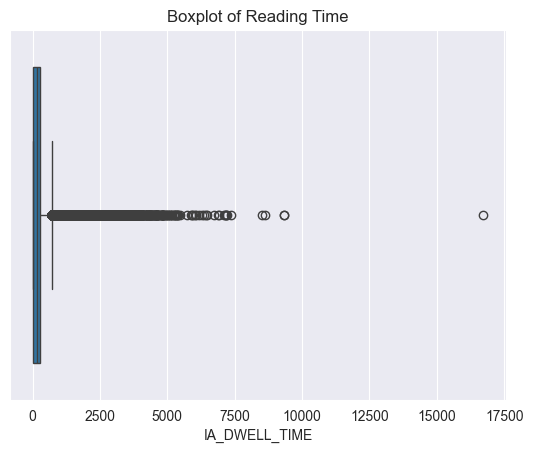

lower_bound: 0
upper_bound: 717.5


In [9]:
lower_bound, upper_bound = get_lower_upper_bounds(df, 'IA_DWELL_TIME')

In [10]:
tmp = GAM_summary(df, 'IA_DWELL_TIME')

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                 5.605e+04
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:28:08   Log-Likelihood:            -7.3626e+06
No. Observations:             1090031   AIC:                         1.473e+07
Df Residuals:                 1090027   BIC:                         1.473e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.3495      0

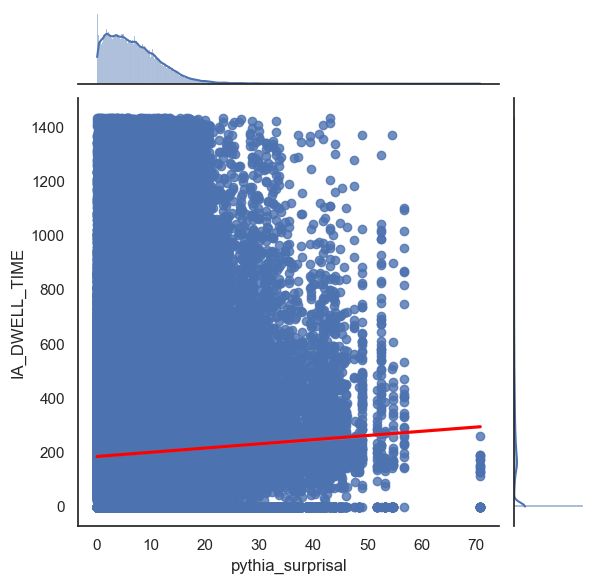

In [18]:
plot_rt_surprisals(tmp, 'IA_DWELL_TIME')

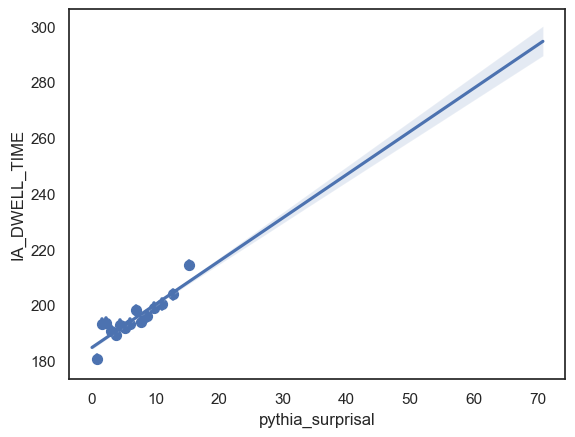

In [19]:
plot_rt_surprisal_withbin(tmp, 'IA_DWELL_TIME')

### "SpillOver" effect

In [18]:
make_spillover_column(tmp, 'IA_DWELL_TIME')

#### Current Word

In [19]:
GAM_summary_current_word(tmp, 'IA_DWELL_TIME')

                            OLS Regression Results                            
Dep. Variable:          IA_DWELL_TIME   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                 5.585e+04
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:30:18   Log-Likelihood:            -7.3629e+06
No. Observations:             1090031   AIC:                         1.473e+07
Df Residuals:                 1090027   BIC:                         1.473e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Next Word

In [20]:
GAM_summary_spillover(tmp)

                            OLS Regression Results                            
Dep. Variable:           spillover_rt   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2397.
Date:                Tue, 10 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:30:18   Log-Likelihood:            -7.3671e+06
No. Observations:             1079953   AIC:                         1.473e+07
Df Residuals:                 1079949   BIC:                         1.473e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## Gaze Duration (IA_FIRST_RUN_DWELL_TIME)

In [ ]:
gaze_duration_df = df[df['IA_FIRST_FIX_PROGRESSIVE'] == '1']
gaze_duration_df['IA_FIRST_RUN_DWELL_TIME'] = pd.to_numeric(gaze_duration_df['IA_FIRST_RUN_DWELL_TIME'], errors='coerce')

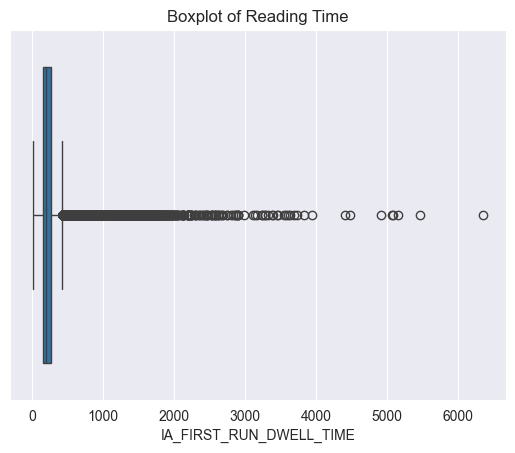

lower_bound: 0
upper_bound: 423.5


In [10]:
lower_bound, upper_bound = get_lower_upper_bounds(gaze_duration_df, 'IA_FIRST_RUN_DWELL_TIME')

In [11]:
tmp = GAM_summary(gaze_duration_df, 'IA_FIRST_RUN_DWELL_TIME')

                               OLS Regression Results                              
Dep. Variable:     IA_FIRST_RUN_DWELL_TIME   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     5389.
Date:                     Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                             17:53:01   Log-Likelihood:            -2.9895e+06
No. Observations:                   492000   AIC:                         5.979e+06
Df Residuals:                       491996   BIC:                         5.979e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

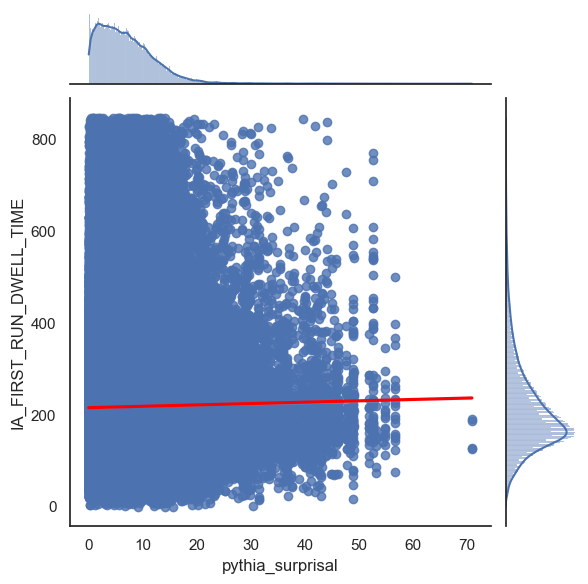

In [12]:
plot_rt_surprisals(tmp, 'IA_FIRST_RUN_DWELL_TIME')

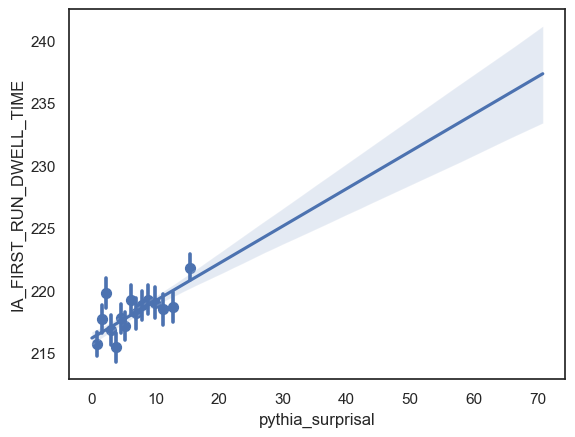

In [13]:
plot_rt_surprisal_withbin(tmp, 'IA_FIRST_RUN_DWELL_TIME')

### "SpillOver" effect

In [14]:
make_spillover_column(tmp, 'IA_FIRST_RUN_DWELL_TIME')

#### Current Word

In [15]:
GAM_summary_current_word(tmp, 'IA_FIRST_RUN_DWELL_TIME')

                               OLS Regression Results                              
Dep. Variable:     IA_FIRST_RUN_DWELL_TIME   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     5380.
Date:                     Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                             17:55:17   Log-Likelihood:            -2.9895e+06
No. Observations:                   492000   AIC:                         5.979e+06
Df Residuals:                       491996   BIC:                         5.979e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

#### Next Word

In [16]:
GAM_summary_spillover(tmp)

                            OLS Regression Results                            
Dep. Variable:           spillover_rt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     625.0
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:55:23   Log-Likelihood:            -2.9351e+06
No. Observations:              481922   AIC:                         5.870e+06
Df Residuals:                  481918   BIC:                         5.870e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## First Fixation Duration (IA_FIRST_FIXATION_DURATION)

In [ ]:
ff_duration_df = df[df['IA_FIRST_FIX_PROGRESSIVE'] == '1']
ff_duration_df['IA_FIRST_FIXATION_DURATION'] = pd.to_numeric(ff_duration_df['IA_FIRST_FIXATION_DURATION'], errors='coerce')

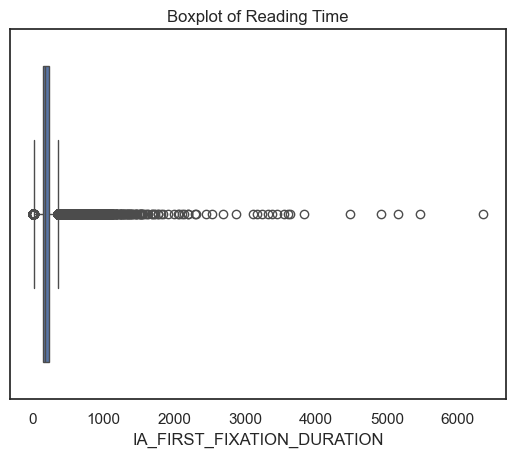

lower_bound: 15.5
upper_bound: 363.5


In [19]:
lower_bound, upper_bound = get_lower_upper_bounds(ff_duration_df, 'IA_FIRST_FIXATION_DURATION')

In [20]:
tmp = GAM_summary(ff_duration_df, 'IA_FIRST_FIXATION_DURATION')

                                OLS Regression Results                                
Dep. Variable:     IA_FIRST_FIXATION_DURATION   R-squared:                       0.004
Model:                                    OLS   Adj. R-squared:                  0.004
Method:                         Least Squares   F-statistic:                     616.9
Date:                        Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                                18:22:14   Log-Likelihood:            -2.8471e+06
No. Observations:                      492139   AIC:                         5.694e+06
Df Residuals:                          492135   BIC:                         5.694e+06
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

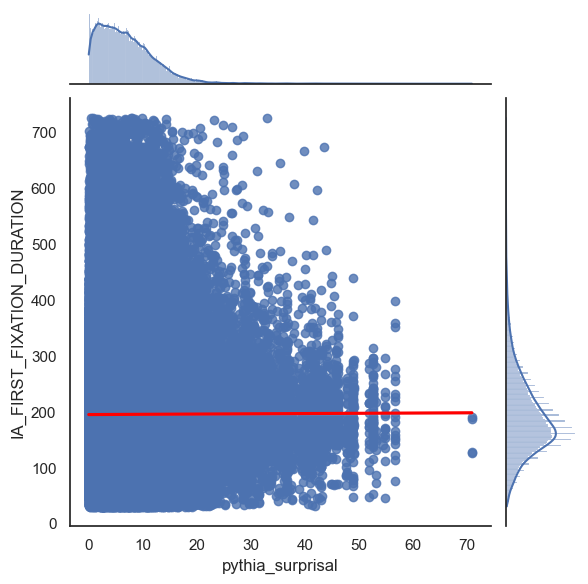

In [21]:
plot_rt_surprisals(tmp, 'IA_FIRST_FIXATION_DURATION')

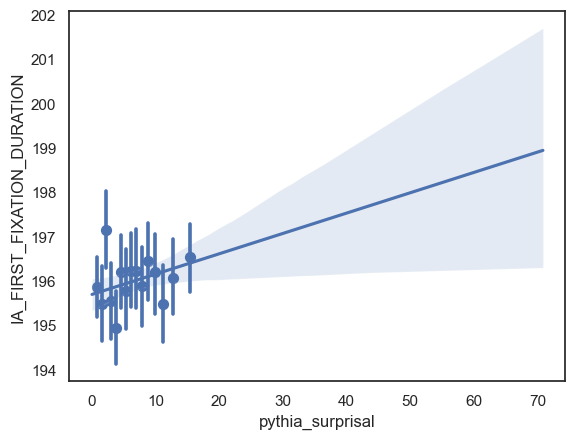

In [22]:
plot_rt_surprisal_withbin(tmp, 'IA_FIRST_FIXATION_DURATION')

### "SpillOver" effect

In [23]:
make_spillover_column(tmp, 'IA_FIRST_FIXATION_DURATION')

#### Current Word

In [24]:
GAM_summary_current_word(tmp, 'IA_FIRST_FIXATION_DURATION')

                                OLS Regression Results                                
Dep. Variable:     IA_FIRST_FIXATION_DURATION   R-squared:                       0.004
Model:                                    OLS   Adj. R-squared:                  0.004
Method:                         Least Squares   F-statistic:                     616.9
Date:                        Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                                18:24:32   Log-Likelihood:            -2.8471e+06
No. Observations:                      492139   AIC:                         5.694e+06
Df Residuals:                          492135   BIC:                         5.694e+06
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

#### Next Word

In [25]:
GAM_summary_spillover(tmp)

                            OLS Regression Results                            
Dep. Variable:           spillover_rt   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     397.1
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.10e-257
Time:                        18:25:16   Log-Likelihood:            -2.7910e+06
No. Observations:              482061   AIC:                         5.582e+06
Df Residuals:                  482057   BIC:                         5.582e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     